# Naïve Bayes Classifier

## Import the necessary libraires

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

## Read the data

In [22]:
data = pd.read_csv('chirper.csv', encoding = "ISO-8859-1")
data.head()

,Target,IDS,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [23]:
data['Target'].value_counts()

1    9500
0     500
Name: Target, dtype: int64

## Define the inputs and the target

Identify the **relevant** columns and declare the variables below.

In [24]:
inputs = data['Text']
target = data['Target']

## Split the data into training and tesitng

In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=365, stratify=target)

## Transform the training and testing inputs using CountVectorizer

In [26]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [27]:
nb_model = ComplementNB()
nb_model.fit(X_train_transformed, y_train)

ComplementNB()

## Make predictions on the test data

In [28]:
y_pred = nb_model.predict(X_test_transformed)

## Create a confusion matrix

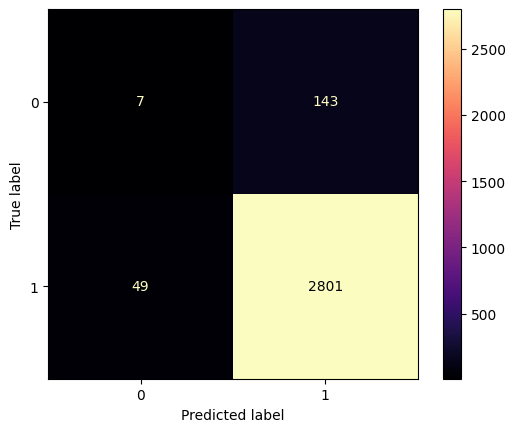

In [29]:
# Create a confusion matrix display based on the predicted labels y_test_pred and the true labels y_test.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=nb_model.classes_, cmap='magma')
plt.show()

## Print a classification report

In [32]:
print(classification_report(y_test, y_pred, labels=nb_model.classes_, zero_division = 0))

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       150
           1       0.95      0.98      0.97      2850

    accuracy                           0.94      3000
   macro avg       0.54      0.51      0.52      3000
weighted avg       0.91      0.94      0.92      3000

